In [21]:
import nltk
from nltk.corpus import brown, state_union, swadesh, names, gutenberg
from nltk.corpus import wordnet as wn

<b>1) Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.</b>

In [22]:
phrase = ["these", "words", "are", "the", "best", "words"]

phrase + phrase

['these',
 'words',
 'are',
 'the',
 'best',
 'words',
 'these',
 'words',
 'are',
 'the',
 'best',
 'words']

In [23]:
phrase * 3

['these',
 'words',
 'are',
 'the',
 'best',
 'words',
 'these',
 'words',
 'are',
 'the',
 'best',
 'words',
 'these',
 'words',
 'are',
 'the',
 'best',
 'words']

In [24]:
phrase[-5]

'words'

In [25]:
phrase[:5]

['these', 'words', 'are', 'the', 'best']

In [26]:
sorted(phrase)

['are', 'best', 'the', 'these', 'words', 'words']

<b>2. Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?</b>

In [27]:
import nltk
persuasion = nltk.corpus.gutenberg.words("austen-persuasion.txt")
print(len(persuasion)) #tokens
print(len(set(persuasion))) #word types

98171
6132


<b>3) Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.</b>

In [28]:
from nltk.corpus import brown
print(brown.words(categories=["science_fiction"]))
print(brown.words(categories=["lore"]))

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]
['In', 'American', 'romance', ',', 'almost', 'nothing', ...]


<b>4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?</b>

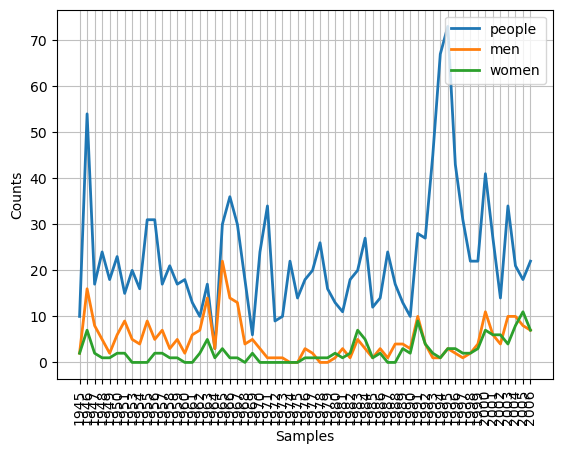

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in state_union.fileids()
          for w in state_union.words(fileid)
          for target in ['men', 'women', 'people']
          if w.lower().startswith(target))
cfd.plot()

<b>5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().</b>

In [30]:
water = wn.synset('water.n.01')
print(water.substance_holonyms())
print(water.substance_meronyms())
print("\n")
train = wn.synset('train.n.01')
print(train.member_meronyms())
print(train.member_holonyms())
print("\n")
hat = wn.synset('hat.n.01')
print(hat.part_meronyms())
print(hat.part_holonyms())

[Synset('body_of_water.n.01'), Synset('ice.n.01'), Synset('ice_crystal.n.01'), Synset('perspiration.n.01'), Synset('snowflake.n.01'), Synset('tear.n.01')]
[Synset('hydrogen.n.01'), Synset('oxygen.n.01')]


[Synset('car.n.02'), Synset('locomotive.n.01')]
[]


[Synset('brim.n.02'), Synset('crown.n.05'), Synset('hatband.n.01')]
[]


<b>6. In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach?</b>

Some words might have two alternatives that take up one element of the swadesh words list, eg. "nah, nahe" for German. If I wanted to type <code>translate['nahe']</code>, I would get a KeyError. 

<b>7. According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering.</b>

In [31]:
paradise = nltk.Text(nltk.corpus.gutenberg.words('milton-paradise.txt'))
paradise.concordance('however')
print("\n")
moby = nltk.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
moby.concordance('however')

Displaying 9 of 9 matches:
 wise he judges it to fly from pain However , and to ' scape his punishment ! S
truct his sight , Star interposed , however small he sees , Not unconformed to 
f into the Hell Thou fablest ; here however to dwell free , If not to reign : M
 back perverse : But that I doubt ; however witness , Heaven ! Heaven , witness
the ways Of highest agents , deemed however wise . Queen of this universe ! do 
f scorn , not to be given the Foe . However I with thee have fixed my lot , Cer
n my head both sin and punishment , However insupportable , be all Devolved ; t
pride , and joy , for Man seduced . However , some tradition they dispersed Amo
 and to the hand of Heaven submit , However chastening ; to the evil turn My ob


Displaying 25 of 95 matches:
gledy - piggledy whale statements , however authentic , in these extracts , for
lave ? Tell me that . Well , then , however the old sea - captains may order me
ea - captains may order me about -- however they may thump and

<b>8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).</b>

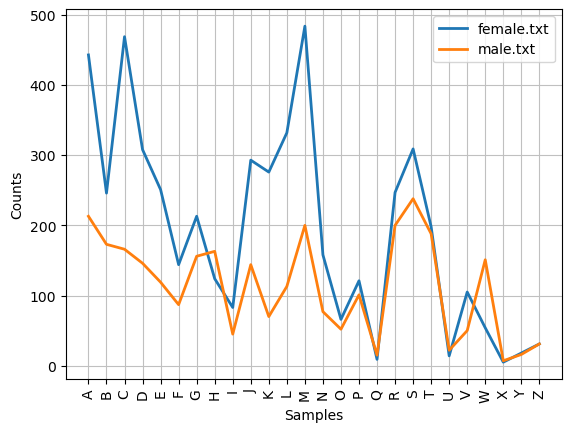

<Axes: xlabel='Samples', ylabel='Counts'>

In [32]:
cfd = nltk.ConditionalFreqDist(
(fileid, name[0])
for fileid in names.fileids()
for name in names.words(fileid))
cfd.plot()

<b>9. Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?</b>

In [62]:
sense = nltk.Text(gutenberg.words('austen-sense.txt'))
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))

for fileid in gutenberg.fileids():
    if fileid == 'austen-sense.txt' or fileid == 'melville-moby_dick.txt':
        num_chars = len(gutenberg.raw(fileid))
        num_words = len(gutenberg.words(fileid))
        num_sents = len(gutenberg.sents(fileid))
        num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
        print(f"Average sentence length of {fileid}: {round(num_words/num_sents)}\nLexical diversity of {fileid}: {round(num_words/num_vocab)}")

Average sentence length of austen-sense.txt: 28
Lexical diversity of austen-sense.txt: 22
Average sentence length of melville-moby_dick.txt: 26
Lexical diversity of melville-moby_dick.txt: 15
